In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from joblib import load

In [2]:
from sklearn.metrics import RocCurveDisplay, roc_curve, PrecisionRecallDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("white")
plt.rc('font', size=10)

In [28]:
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    cm = cm*100
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

In [4]:
allergen_model = load("../../generated_models/allergen/logistic_model.joblib")
allergen_test_dataset = pd.read_csv("../../processed_data/allergen/protrans_xlu50/test_dataset.csv")

allergen_values = allergen_test_dataset.drop(columns=["Label"])
allergen_labels = allergen_test_dataset["Label"]

In [5]:
celiac_model = load("../../generated_models/celiac/generated_model_glove.joblib")
celiac_test_dataset = pd.read_csv("../../processed_data/celiac/glove/test_dataset.csv")

celiac_values = celiac_test_dataset.drop(columns=["Label"])
celiac_labels = celiac_test_dataset["Label"]

In [6]:
cytotoxic_model = load("../../generated_models/cytotoxic/esm1b_hist_model.joblib")
cytotoxic_test_dataset = pd.read_csv("../../processed_data/cytotoxic/esm1b/test_dataset.csv")

cytotoxic_values = cytotoxic_test_dataset.drop(columns=["Label"])
cytotoxic_labels = cytotoxic_test_dataset["Label"]

In [7]:
hemolytic_model = load("../../generated_models/hemolytic/generated_model_hist.joblib")
hemolytic_test_dataset = pd.read_csv("../../processed_data/hemolytic/protrans_xlu50/test_dataset.csv")

hemolytic_values = hemolytic_test_dataset.drop(columns=["Label"])
hemolytic_labels = hemolytic_test_dataset["Label"]

In [8]:
neurotoxin_model = load("../../generated_models/neurotoxin/adaboost_model.joblib")
neurotoxin_test_dataset = pd.read_csv("../../processed_data/neurotoxin/esm1b/test_dataset.csv")

neurotoxin_values = neurotoxin_test_dataset.drop(columns=["Label"])
neurotoxin_labels = neurotoxin_test_dataset["Label"]

In [9]:
toxic_model = load("../../generated_models/toxic/hist_model.joblib")
toxic_test_dataset = pd.read_csv("../../processed_data/toxic/esm1b/test_dataset.csv")

toxic_values = toxic_test_dataset.drop(columns=["Label"])
toxic_labels = toxic_test_dataset["Label"]

In [10]:
y_pred_proba_allergen = allergen_model.predict_proba(allergen_values)[:, 1]
y_pred_proba_celiac = celiac_model.predict_proba(celiac_values)[:, 1]
y_pred_proba_cytotoxic = cytotoxic_model.predict_proba(cytotoxic_values)[:, 1]
y_pred_proba_neurotoxin = neurotoxin_model.predict_proba(neurotoxin_values)[:, 1]
y_pred_proba_hemolytic = hemolytic_model.predict_proba(hemolytic_values)[:, 1]
y_pred_proba_toxic = toxic_model.predict_proba(toxic_values)[:, 1]

In [16]:
allergen_predict = allergen_model.predict(allergen_values)
celiac_predict = celiac_model.predict(celiac_values)
cytotoxic_predict = cytotoxic_model.predict(cytotoxic_values)
neurotoxin_predict = neurotoxin_model.predict(neurotoxin_values)
hemolytic_predict = hemolytic_model.predict(hemolytic_values)
toxic_predict = toxic_model.predict(toxic_values)

In [27]:
cm = confusion_matrix(allergen_labels, allergen_predict, normalize="true")
cm*100

array([[90.27777778,  9.72222222],
       [19.1011236 , 80.8988764 ]])

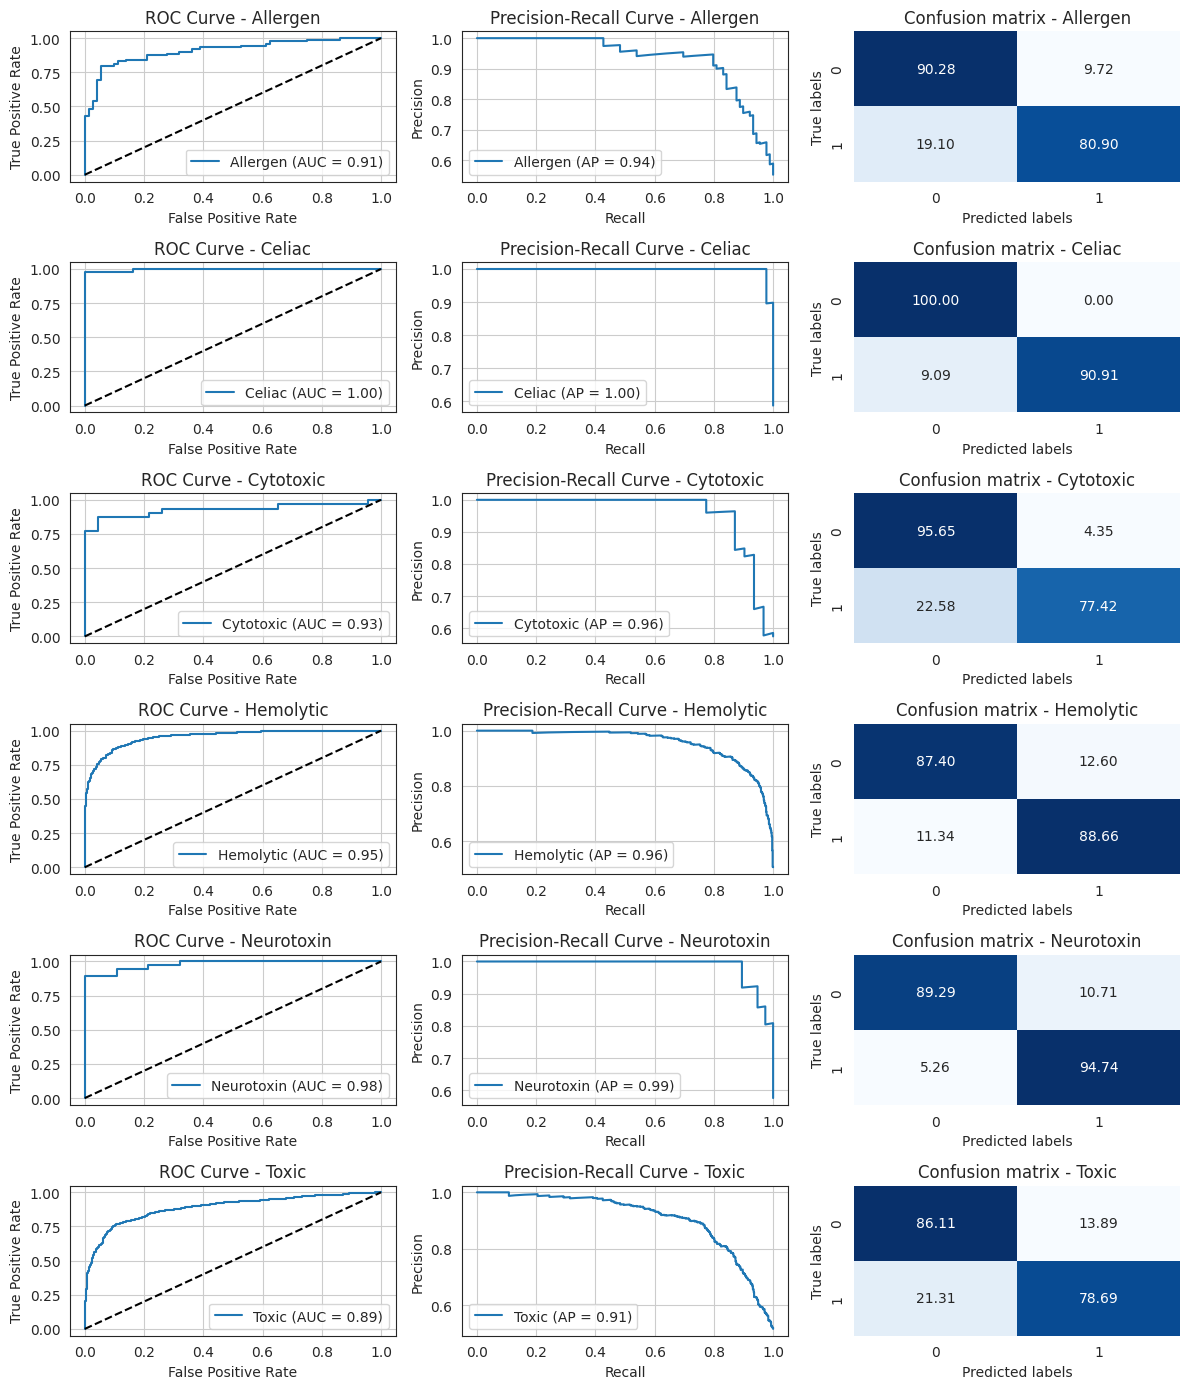

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Configuración de subplots para ROC, Precision-Recall, y Matriz de Confusión
fig, axs = plt.subplots(6, 3, figsize=(12, 14))

# ROC y Precision-Recall para cada tarea
for i, (y_test, y_pred_proba, y_pred, model_name) in enumerate(
    [(allergen_labels, y_pred_proba_allergen, allergen_predict, "Allergen"),
     (celiac_labels, y_pred_proba_celiac, celiac_predict, "Celiac"),
     (cytotoxic_labels, y_pred_proba_cytotoxic, cytotoxic_predict, "Cytotoxic"),
     (hemolytic_labels, y_pred_proba_hemolytic, hemolytic_predict, "Hemolytic"),
     (neurotoxin_labels, y_pred_proba_neurotoxin, neurotoxin_predict, "Neurotoxin"),
     (toxic_labels, y_pred_proba_toxic, toxic_predict, "Toxic")]):

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axs[i, 0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    axs[i, 0].plot([0, 1], [0, 1], 'k--')
    axs[i, 0].set_xlabel('False Positive Rate')
    axs[i, 0].set_ylabel('True Positive Rate')
    axs[i, 0].set_title(f'ROC Curve - {model_name}')
    axs[i, 0].legend(loc="lower right")
    axs[i, 0].grid()

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    axs[i, 1].plot(recall, precision, label=f'{model_name} (AP = {ap:.2f})')
    axs[i, 1].set_xlabel('Recall')
    axs[i, 1].set_ylabel('Precision')
    axs[i, 1].set_title(f'Precision-Recall Curve - {model_name}')
    axs[i, 1].legend(loc="lower left")
    axs[i, 1].grid()

    plot_confusion_matrix(axs[i, 2], y_test, y_pred, f'Confusion matrix - {model_name}')

plt.tight_layout()

plt.savefig("../../figures_paper/models_description.png", dpi=300)
